In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import timm
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import os
from PIL import Image
import matplotlib.pyplot as plt
import pickle

In [1]:
class EfficientNetEmbeddingModel(nn.Module):
    def __init__(self):
        super(EfficientNetEmbeddingModel, self).__init__()
        self.model = timm.create_model('efficientnet_b0', pretrained=True)
        self.model.classifier = nn.Identity()  # Fully connected layer 제거

    def forward(self, x):
        return self.model(x)
    

# 모델 인스턴스 생성
model = EfficientNetEmbeddingModel()

# 모델을 pkl 파일로 저장
with open('efficientnet_embedding_model.pkl', 'wb') as f:
    pickle.dump(model, f)


# pkl 파일에서 모델 불러오기
with open('efficientnet_embedding_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

임베딩 벡터 크기: (4, 1280)
코사인 유사도 행렬 크기: (4, 4)
기준 이미지: ./img_dir\1.png


c:\Users\ben81\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ben81\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ben81\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ben81\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ben81\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


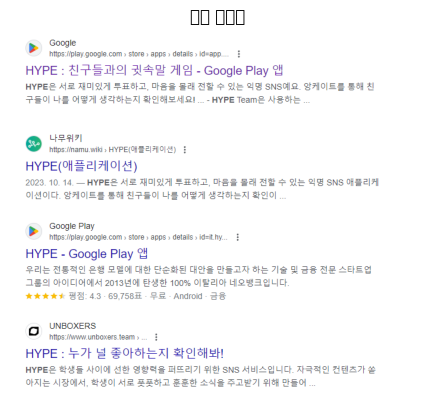

유사한 이미지들:
이미지: ./img_dir\2.png, 유사도 점수: 0.9560985565185547


c:\Users\ben81\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ben81\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ben81\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ben81\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


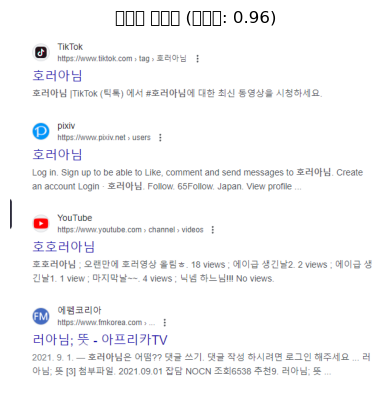

이미지: ./img_dir\3.png, 유사도 점수: 0.6613436341285706
이미지: ./img_dir\4.png, 유사도 점수: 0.6543118357658386
기준 이미지: ./img_dir\2.png


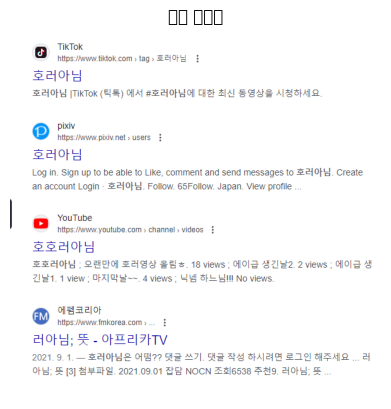

유사한 이미지들:
이미지: ./img_dir\1.png, 유사도 점수: 0.9560985565185547


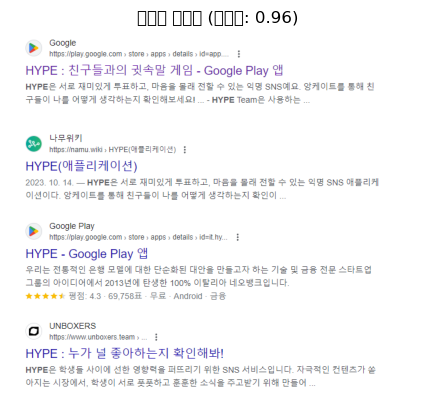

이미지: ./img_dir\3.png, 유사도 점수: 0.6403086185455322
이미지: ./img_dir\4.png, 유사도 점수: 0.6313474178314209
기준 이미지: ./img_dir\3.png


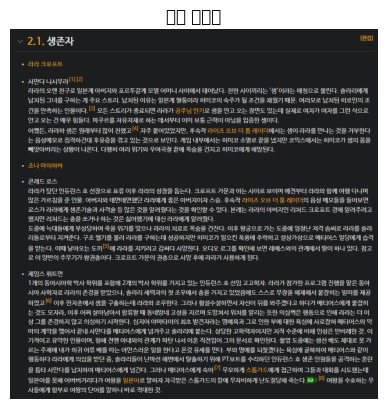

유사한 이미지들:
이미지: ./img_dir\4.png, 유사도 점수: 0.9728785753250122


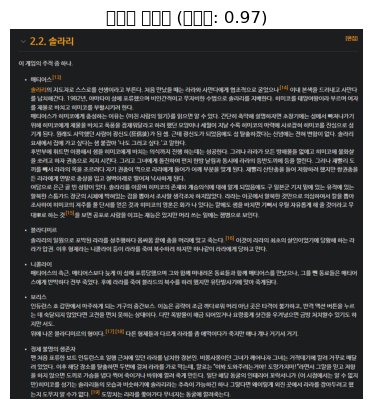

이미지: ./img_dir\1.png, 유사도 점수: 0.6613436341285706
이미지: ./img_dir\2.png, 유사도 점수: 0.6403086185455322
기준 이미지: ./img_dir\4.png


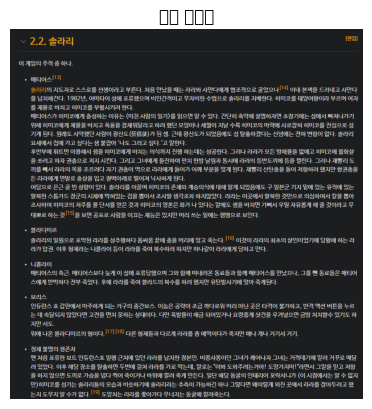

유사한 이미지들:
이미지: ./img_dir\3.png, 유사도 점수: 0.9728785753250122


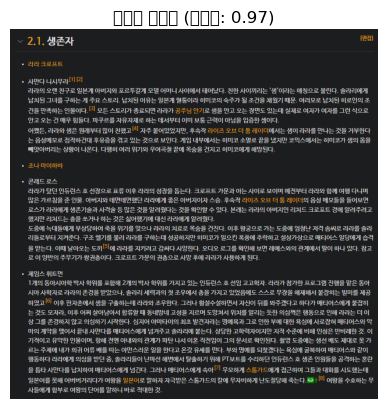

이미지: ./img_dir\1.png, 유사도 점수: 0.6543118357658386
이미지: ./img_dir\2.png, 유사도 점수: 0.6313474178314209


IndexError: index 4 is out of bounds for axis 0 with size 4

In [5]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 이미지 전처리 및 임베딩 함수
def get_image_embeddings(image_folder):
    # 지원하는 이미지 파일 확장자 목록
    valid_extensions = ('.jpg', '.jpeg', '.png')

    # 이미지 파일 경로 로드
    image_paths = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder) if fname.lower().endswith(valid_extensions)]
    images = []
    for image_path in image_paths:
        image = Image.open(image_path)
        if image.mode == 'RGBA':  # 4채널 이미지를 3채널로 변환
            image = image.convert('RGB')
        images.append(transform(image).unsqueeze(0))

    # 모델 초기화
    model = loaded_model.to(device)
    model.eval()

    embeddings = []
    with torch.no_grad():
        for image in images:
            image = image.to(device)
            output = model(image)
            embeddings.append(output.cpu())

    embeddings = torch.cat(embeddings)
    return embeddings.numpy(), image_paths

# 모델을 GPU로 이동
device = "cuda" if torch.cuda.is_available() else "cpu"

# 임베딩 추출
# image_folder = '/content/Image_folder'
image_folder = './img_dir'
embeddings, image_paths = get_image_embeddings(image_folder)

# 코사인 유사도 계산
cosine_sim_matrix = cosine_similarity(embeddings)

print("임베딩 벡터 크기:", embeddings.shape)
print("코사인 유사도 행렬 크기:", cosine_sim_matrix.shape)

# 유사한 이미지 찾기 함수
def find_similar_images(image_index, top_k=5):
    similar_indices = np.argsort(-cosine_sim_matrix[image_index])[:top_k + 1]
    similar_images = [(image_paths[i], cosine_sim_matrix[image_index, i]) for i in similar_indices if i != image_index]
    return similar_images

def display_image(image_path, title):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


# 예시: 첫 번째 이미지와 유사한 상위 5개 이미지 찾기
for image_index in range(18):

    similar_images = find_similar_images(image_index)


    print("기준 이미지:", image_paths[image_index])
    display_image(image_paths[image_index], "기준 이미지")

    # 첫 유사한 이미지만 표시하는 플래그
    first_image_shown = False

    print("유사한 이미지들:")
    for path, score in similar_images:
        if not first_image_shown:
            print(f"이미지: {path}, 유사도 점수: {score}")
            display_image(path, f"유사한 이미지 (유사도: {score:.2f})")
            first_image_shown = True
        else:
            print(f"이미지: {path}, 유사도 점수: {score}")